In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7.5,5)})
sns.set_style('ticks')

import warnings
warnings.filterwarnings('ignore')

#### Preamble

In [2]:
df = pd.read_csv(os.path.join('files', 'for-plots.csv'))

df['minutes'] = [str(x).replace(',','') for x in df['minutes']]
df['minutes'] = df['minutes'].astype('float')

# df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='Senate'), 'federal:senate', df['seat'])
# df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='House'), 'federal:house', df['seat'])
# df['seat'] = np.where((df['seat'].isnull())&(df['chamber']=='President'), 'federal:president', df['seat'])

In [3]:
# Graph settings
TRANSPARENCY = 0.45
LINECOLOR = 'dimgray'
REPCOLOR = 'tab:red'
DEMCOLOR = 'midnightblue'
LEGENDLOC = 'upper right'

PALETTE2 = ['darkorange', 'darkgreen'] # For senate vs others

### All

In [4]:
score = 'nominate_dim1'

_samplesize = len(df[(df[score].notnull()) & (df['minutes'].notnull())])

# Median scores
DEM_MEDIAN = df[df['party']=='D'][score].median()
REP_MEDIAN = df[df['party']=='R'][score].median()

_mask = (df['party']=='D') & (df['seat']=='federal:senate')
DEM_SENATE_MEDIAN = df[_mask][score].median()

_mask = (df['party']=='R') & (df['seat']=='federal:senate')
REP_SENATE_MEDIAN = df[_mask][score].median()

agg = df[df['minutes'].notnull()].groupby(score)['minutes'].sum().reset_index()

Text(0.5, 0, 'NOMINATE \n(n=280)')

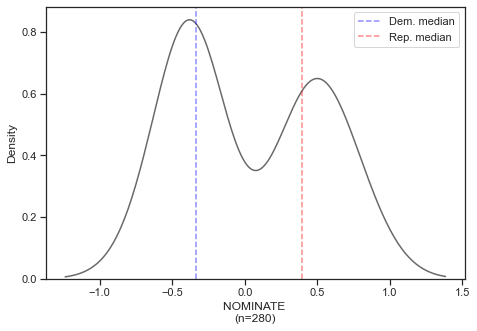

In [5]:
g = sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR, legend=True)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Dem. median', 'Rep. median'], loc=LEGENDLOC)
plt.xlabel(f'NOMINATE \n(n={_samplesize})')

Text(0.5, 0, 'NOMINATE \n(n=280)')

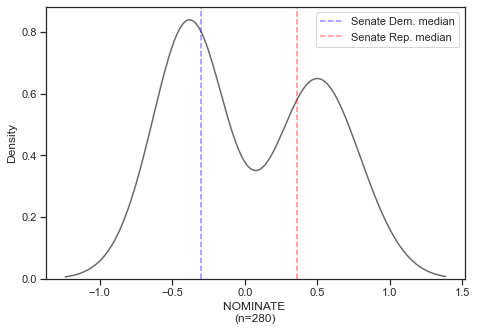

In [6]:
g = sns.kdeplot(data=agg, x=score, weights='minutes', color=LINECOLOR, legend=True)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color='blue', alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color='red', alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=7)

plt.legend(g.lines[1:], ['Senate Dem. median', 'Senate Rep. median'], loc=LEGENDLOC)
plt.xlabel(f'NOMINATE \n(n={_samplesize})')

### Senate vs. others

In [7]:
# Get sample counts
_mask = (df['seat']=='federal:senate') & (df[score].notnull()) & (df['minutes'].notnull())
senate_count = len(df[_mask])

_mask = (df['seat']!='federal:senate') & (df[score].notnull())  & (df['minutes'].notnull())
others_count = len(df[_mask])

_mask = (df['minutes'].notnull())
_df = df[_mask]
_df['Senate'] = np.where(_df['seat']=='federal:senate', 'Yes', 'No')

agg = _df.groupby([score, 'Senate'])['minutes'].sum().reset_index()

Text(0.5, 0, 'NOMINATE')

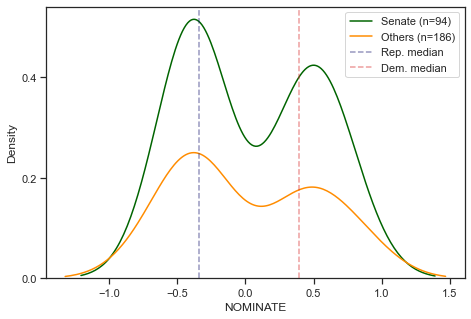

In [8]:
g = sns.kdeplot(data=agg, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=5)

plt.legend([f'Senate (n={senate_count})', f'Others (n={others_count})', 'Rep. median', 'Dem. median'], 
           loc=LEGENDLOC)
plt.xlabel('NOMINATE')

Text(0.5, 0, 'NOMINATE')

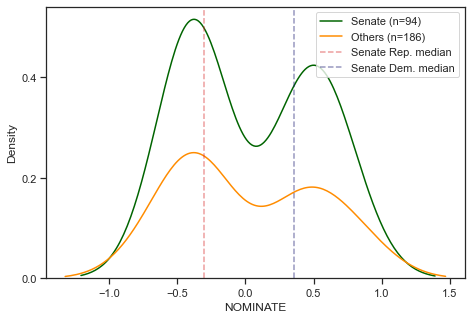

In [9]:
g = sns.kdeplot(data=agg, x=score, hue='Senate', weights='minutes', palette=PALETTE2)

plt.axvline(x=DEM_SENATE_MEDIAN, linestyle='--', color=REPCOLOR, alpha=TRANSPARENCY)
plt.axvline(x=REP_SENATE_MEDIAN, linestyle='--', color=DEMCOLOR, alpha=TRANSPARENCY)

g.locator_params(axis='y', nbins=5)

plt.legend([f'Senate (n={senate_count})', f'Others (n={others_count})', 'Senate Rep. median', 'Senate Dem. median'], 
           loc=LEGENDLOC)
plt.xlabel('NOMINATE')